# Arbres binaires de recherche

## Principe

Un ABR est un arbre binaire dont les étiquettes, appelées clés

* sont de type ordonné 
* satisfont la condition d'ABR: Pour tout noeud `R` de l'ABR, 

    * `G.clef < R.clef` , pour tout noeud G du sous-arbre de `R.gauche`
    * `D.clef > R.clef` , pour tout noeud D du sous-arbre de `R.droite`


In [2]:
class Noeud:
    def __init__(self,val):
        self.clef = val
        self.gauche = None
        self.droite = None

Par exemple, l'arbre suivant respecte la condition d'ABR

In [34]:
R = Noeud(4)
R.gauche = G = Noeud(2)
G.gauche = Noeud(1); G.droite = Noeud(3)
R.droite = D = Noeud(5)
D.droite = DD = Noeud(7)
DD.gauche = Noeud(6)
import include.helpers as h

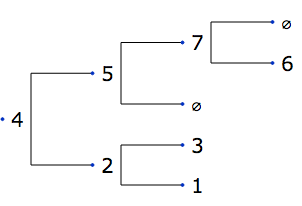

In [35]:
h.afficher_ABR(R)

## Recherche

La condition d'ABR permet de recherche efficacement une clef dans l'arbre. 

En comparant la valeur cherchée à la clef de la racine `R` d'un sous-arbre, on a toujours 4 possibilités

* Le sous-arbre `R` est vide → la valeur est absente
* `valeur == R.clef` → on l'a trouvée
* `valeur  < R.clef` → il faut chercher à gauche
* `valeur  > R.clef` → il faut chercher à droite

In [36]:
def chercher(R,val): 
    # retourne le noeud de clé val ou None si absent
    if R == None: 
        return None
    print(R.clef, end=" ") # pour la demo seulement
    if val == R.clef: 
        return R
    elif val < R.clef:
        return chercher(R.gauche,val)
    else: # val > R.clef:
        return chercher(R.droite,val)

def contient(R,val):
    # retourne un booléen
    return chercher(R,val) != None

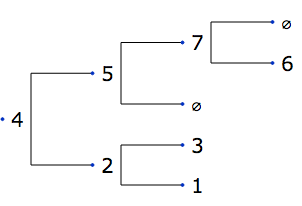

In [37]:
h.afficher_ABR(R)

# Tracez la recherche des clés 3, 6 et 8

In [38]:
print(contient(R,3))

4 2 3 True


In [39]:
print(contient(R,6))

4 5 7 6 True


In [40]:
print(contient(R,8))

4 5 7 False


Notons que l'on peut aussi écrire la fonction sous forme itérative

In [42]:
def chercher(R,val): 
    while R:
        if val == R.clef: 
            break
        elif val < R.clef:
            R = R.gauche
        else: # val > R.clef:
            R = R.droite
    return R

## Insertion

Il suffit de créer un nouveau noeud et de l'accrocher au bon endroit dans l'arbre... 

Algorithme quasiment identique à celui de recherche, sauf

* quand il trouve la clé, il n'insère rien. Un ABR ne contient normalement pas de clef dupliquée


* quand il atteint `None`, il retourne le nouveau noeud dont il a trouvé l'emplacement


* quand il récurse à gauche ou à droite, il raccroche la valeur retournée à l'arbre

In [110]:
def inserer(R,val):
    if R == None:
        R = Noeud(val)
        
    elif val < R.clef:
        R.gauche = inserer(R.gauche,val)
    
    elif val > R.clef:
        R.droite = inserer(R.droite,val)
    
    else: # val == R.clef
        pass
    
    return R

In [113]:
T = [ 3, 4, 7, 6, 3, 5, 6, 1, 2 ]
R = None
for t in T: R = inserer(R,t)
    
# Dessinez l'ABR après les insertions

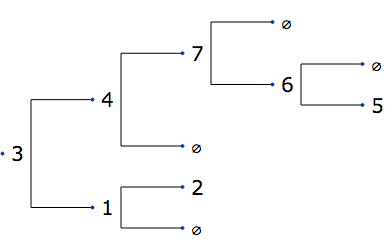

In [114]:
h.afficher_ABR(R)

## Parcours ordonné

La condition d'ABR implique que le parcours symétrique visite les noeuds par ordre croissants

In [115]:
def parcours_croissant(R):
    if R:
        parcours_croissant(R.gauche)
        print(R.clef, end=" ")
        parcours_croissant(R.droite)
        
parcours_croissant(R)

1 2 3 4 5 6 7 

In [116]:
def parcours_decroissant(R):
    if R:
        parcours_decroissant(R.droite)
        print(R.clef, end=" ")
        parcours_decroissant(R.gauche)
        
parcours_decroissant(R)

7 6 5 4 3 2 1 

## Recherche des extrema

Pour trouver le noeud de clef minimale, il suffit d'aller le plus à gauche possible. 

In [117]:
def noeud_min(R):
    if R == None: raise IndexError()
    
    if R.gauche: 
        return noeud_min(R.gauche)
    else:
        return R
        
def clef_min(R):
    return noeud_min(R).clef

Pour le noeud de clef maximale, on fait de même vers la droite

In [118]:
def noeud_max(R):
    if R == None: raise IndexError()
    return noeud_max(R.droite) if R.droite else R
        
def clef_max(R):
    return noeud_max(R).clef

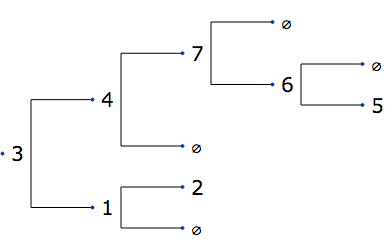

In [119]:
h.afficher_ABR(R)

# Trouvez les clés minimales et maximales de l'arbre

In [120]:
print("clef min:",clef_min(R))
print("clef max:",clef_max(R))

clef min: 1
clef max: 7


## Suppression d'un extremum

Pour supprimer un élément, il faut 

* détruire son noeud
* raccrocher ses enfants au reste de l'arbre en respectant la condition ABR. 

Dans le cas d'un extremum, c'est assez simple puisque les extrema ont toujours un enfant vide. Il suffit donc de raccrocher l'autre enfant à la place du noeud supprimé

In [121]:
def supprimer_min(R):
    if R == None: raise IndexError()

    if R.gauche:
        R.gauche = supprimer_min(R.gauche)
        return R
    else:
        return R.droite

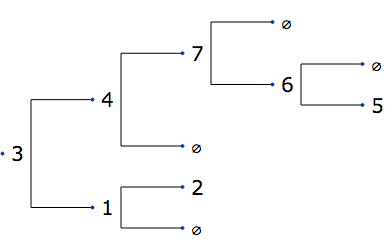

In [122]:
h.afficher_ABR(R)

# dessinez l'arbre dont on a supprimé le minimum

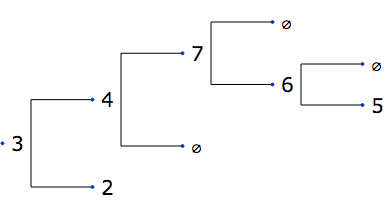

In [123]:
R = supprimer_min(R); h.afficher_ABR(R)

# dessinez l'arbre dont on a supprimé le minimum

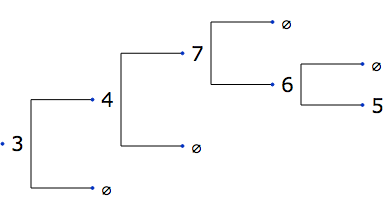

In [124]:
R = supprimer_min(R); h.afficher_ABR(R)

# dessinez l'arbre dont on a supprimé le minimum

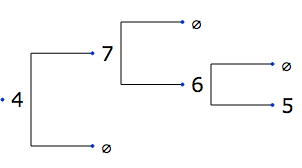

In [125]:
R = supprimer_min(R); h.afficher_ABR(R)

## Suppression d'un élément quelconque

Pour supprimer un noeud quelconque, il faut 

* le trouver 
* le détruire s'il est présent
* raccrocher son / ses enfants au reste de l'arbre en respectant la condition ABR

Le nombre d'enfants d'un noeud d'ABR peut être de 

* zéro (2, 4, 8)
* un (1, 5, 7)
* ou deux (3, 6) 

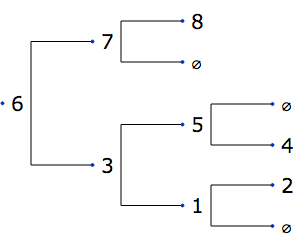

In [129]:
T = [ 6, 3, 1, 2, 5, 4, 7, 8 ]; R = None
for t in T: R = inserer(R,t)
h.afficher_ABR(R)

Nous savons déjà comment 

* chercher un noeud (`chercher`)
* supprimer un noeud ayant zéro ou un enfant (`supprimer_min`)

Mais que faire si le noeud à supprimer a deux enfants ? 

#### Suppression de Hibbard

Créer un sous-arbre unique à raccrocher à la place du noeud supprimé.

En modifiant le moins possible les 2 sous-arbres existants

La racine de ce sous-arbre est extraite d'un des deux sous-arbres pour respecter la condition ABR

* soit le minimum du sous-arbre droit
* soit le maximum du sous-arbre gauche

In [132]:
def supprimer(R,val):
    if R == None: 
        pass
    elif val < R.clef: 
        R.gauche = supprimer(R.gauche,val)
    elif val > R.clef:
        R.droite = supprimer(R.droite,val)
    else: # val == R.clef
        if   R.gauche == None: return R.droite
        elif R.droite == None: return R.gauche
        else: # Hibbard
            tmp = noeud_min(R.droite)
            R.droite = supprimer_min(R.droite)
            tmp.gauche = R.gauche;
            tmp.droite = R.droite
            R = tmp
    return R   

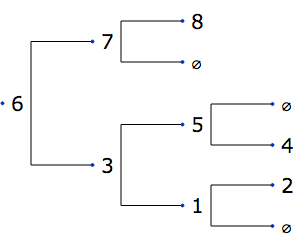

In [133]:
h.afficher_ABR(R)

# Supprimer le noeud de clé 3

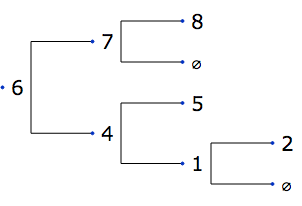

In [134]:
R = supprimer(R,3); h.afficher_ABR(R)

# Supprimer le noeud de clé 6

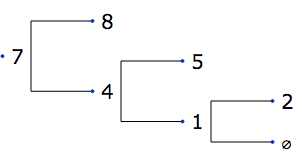

In [135]:
R = supprimer(R,6); h.afficher_ABR(R)

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>